In [2]:
# pip install PyAudio

In [1]:
import wave
import numpy as np
import pyaudio
import matplotlib.pyplot as plt

In [4]:
# to be used as default 
FRAMES_PER_BUFFER = 3200 # frames to be recorded per second 
FORMAT = pyaudio.paInt16 # together, mono single channel: paInt16, stereo: paInt32
CHANNELS = 1 # 
RATE = 16000 # standard frequency

In [5]:
pa = pyaudio.PyAudio()

In [6]:
stream = pa.open(
    format=FORMAT,
    channels=CHANNELS,
    rate=RATE,
    input=True,
    frames_per_buffer=FRAMES_PER_BUFFER
)

In [7]:
print('start recording')

start recording


In [8]:
seconds = 9
frames = []
second_tracking = 0
second_count = 0
for i in range(0, int(RATE/FRAMES_PER_BUFFER*seconds)):
    data = stream.read(FRAMES_PER_BUFFER)
    frames.append(data)
    second_tracking += 1
    if second_tracking == RATE/FRAMES_PER_BUFFER:
        second_count += 1
        second_tracking = 0
        print(f'Time Left: {seconds - second_count} seconds')

Time Left: 7 seconds
Time Left: 6 seconds
Time Left: 5 seconds
Time Left: 4 seconds
Time Left: 3 seconds
Time Left: 2 seconds
Time Left: 1 seconds
Time Left: 0 seconds


In [9]:
# stop recording 
stream.stop_stream()
stream.close()
pa.terminate()

In [10]:
# store information in the file
obj = wave.open('rec_graph_audio.wav', 'wb') # wb = writing binary , # rb = reading binary
obj.setnchannels(CHANNELS) # mono or stereo 
obj.setsampwidth(pa.get_sample_size(FORMAT)) # 32 stereo, 16 mono
obj.setframerate(RATE) # framerate 
obj.writeframes(b''.join(frames)) # all of the frames this is the list which we have just recorded
obj.close() # saves all of your work, everything after that code is just ti plot the wave file 

In [11]:
file = wave.open('rec_graph_audio.wav', 'rb') # rb= read binary 

In [12]:
sample_freq = file.getframerate() # 
frames = file.getnframes() # 
signal_wave = file.readframes(-1) # the actual wave, minus one means read everything

In [13]:
file.close() # 

In [14]:
time = frames / sample_freq # how ,long it is.

In [15]:
# if one channel use int16, if 2 use int32
audio_array = np.frombuffer(signal_wave, dtype=np.int16) # creating array with numpy, from buffer, we give it a wave and we say which data type 

In [16]:
times = np.linspace(0, time, num=frames) # start time and the endtime  and total number of data points to expect in this data frame
# the rest of this is just creating the graph 

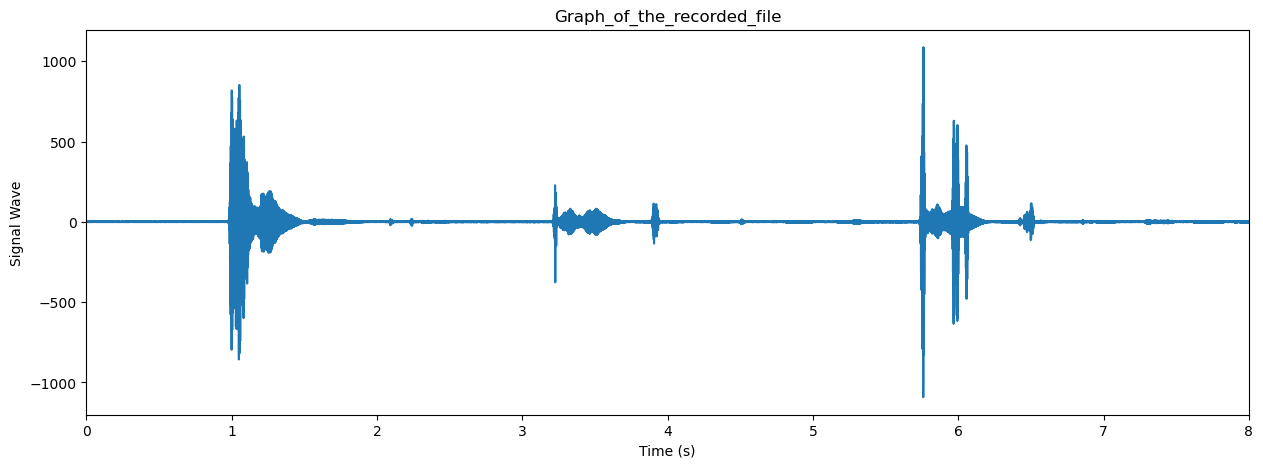

In [17]:
plt.figure(figsize=(15, 5)) # figure size , can play around with this 
plt.plot(times, audio_array) # time x axis, y array in the y axis 
plt.ylabel('Signal Wave') # labels
plt.xlabel('Time (s)') # labels 
plt.xlim(0, time) # x limiti is from zero to time 
plt.title('Graph_of_the_recorded_file') # title of the recorded wave 
plt.show()

In [ ]:
# tested